In [ ]:
# IMPORT LIBRARIES 

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import string 
import nltk
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [ ]:
# READIND THE DATASET

df = pd.read_csv("emails.csv")
x = df['text']
y = df['spam']


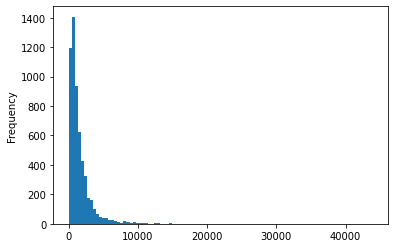

In [ ]:
# analysis of lenght of content of mail 

df['leng'] = df['text'].apply(len)
df['leng'].plot(bins=100, kind='hist')

In [ ]:
# divide dataset into spam and ham 

spam = df[df['spam']==1]
ham = df[df['spam']==0]
print('Spam percentage = ',(len(spam)/len(df))*100,'%')
print('Ham percentage = ',(len(ham)/len(df))*100,'%')


Spam percentage =  23.88268156424581 %
Ham percentage =  76.11731843575419 %


In [ ]:
# define a function for message cleaning 
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
def message_cleaning_procedure(message):
  test_punch = [char  for char in message if char not in string.punctuation]
  test_punch_join = ''.join(test_punch)
  test_clean = [word for word in test_punch_join.split() if word.lower() not in stopwords.words('english')]
  return test_clean


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# apply feature extraction model on each mail before cleaning it 

vect = CountVectorizer(analyzer= message_cleaning_procedure )
x_vect = vect.fit_transform(x)

In [ ]:
# featuring the model with tf-idf

tfidf = TfidfTransformer()
x_vect_tfidf = tfidf.fit_transform(x_vect)

In [ ]:
# divide the dataset intomtraining and test set 

x_train , x_test , y_train , y_test = train_test_split(x_vect_tfidf , y , test_size = 0.2 ,random_state = 1)


In [ ]:
# taining the naive bayes model on training set 

classifier = GaussianNB()
classifier.fit(x_train.toarray() , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# predicting the value for test set based on learning 

y_pred = classifier.predict(x_test.toarray())

[[866  10]
 [ 49 221]]
0.9485165794066318
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       876
           1       0.96      0.82      0.88       270

    accuracy                           0.95      1146
   macro avg       0.95      0.90      0.92      1146
weighted avg       0.95      0.95      0.95      1146



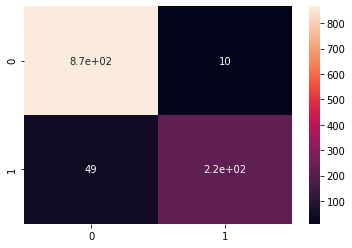

In [ ]:
# evaluation of model 

cm = confusion_matrix(y_test , y_pred)
print(cm)
print(accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred ))
sns.heatmap(cm , annot = True)